# ***Pandas Practics 2.1***

### Here is just a code and its executon results, no comments

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';',
                parse_dates=['start_at', 'end_at', 'arrived_at'])

In [3]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [4]:
source_stat = df[['source', 'user_id']].groupby('source', as_index=False).count().sort_values('user_id', ascending=False)
source_stat

,source,user_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [5]:
max_source_percent = round(9741 * 100 / df.shape[0])
max_source_percent

42

<AxesSubplot:xlabel='source', ylabel='user_id'>

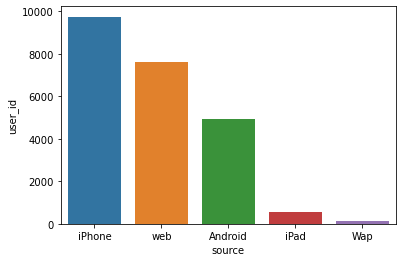

In [6]:
sns.barplot(data=source_stat,
            x='source', y='user_id',
            ci=None)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

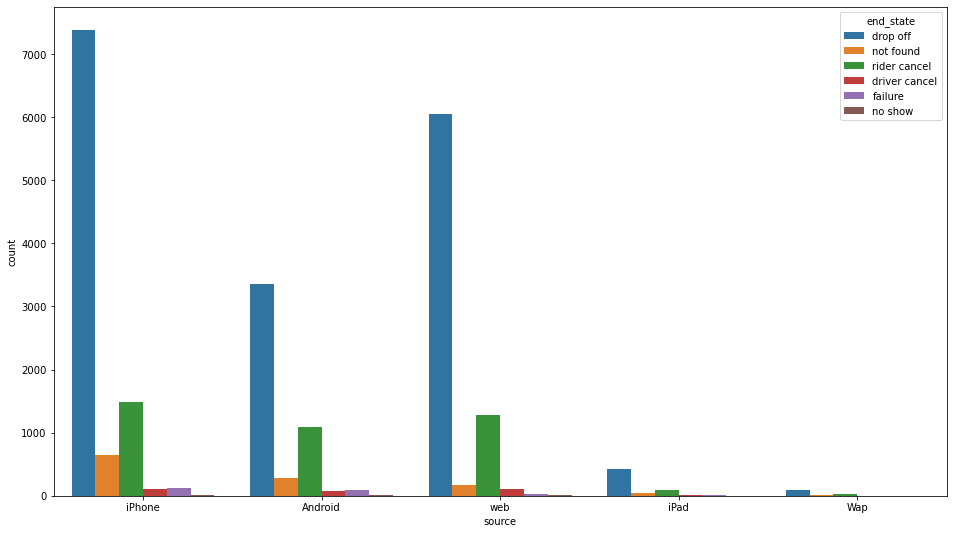

In [7]:
plt.figure(figsize=(16, 9))
sns.countplot(df['source'], hue=df['end_state'])

In [26]:
driver_score_counts = df['driver_score'].value_counts('driver_score', True) \
                                        .mul(100).round(2).reset_index() \
                                        .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
                                        .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


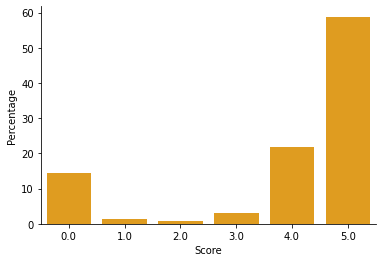

In [33]:
driver_score_ax = sns.barplot(data=driver_score_counts, x='driver_score', y='percentage', color='orange')
driver_score_ax.set(xlabel='Score', ylabel='Percentage')
sns.despine()
plt.show()

In [34]:
rider_score_counts = df['rider_score'].value_counts('rider_score', True) \
                                        .mul(100).round(2).reset_index() \
                                        .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
                                        .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


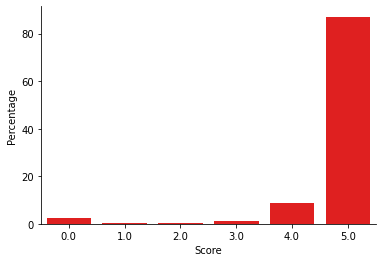

In [35]:
rider_score_ax = sns.barplot(data=rider_score_counts, x='rider_score', y='percentage', color='red')
rider_score_ax.set(xlabel='Score', ylabel='Percentage')
sns.despine()
plt.show()